# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from pathlib import Path
import statsmodels.formula.api as smf
import sklearn
from sklearn import datasets

In [2]:
DATA_DIR = Path('data')
DATA_FILE = DATA_DIR / 'auto_mpg.csv'

# Load Data

In [3]:
car_data = pd.read_csv(DATA_FILE)
print(car_data.shape)
car_data.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
ORIGIN_MAP = {1: 'USA', 2: 'Europe', 3: 'Japan'}

# Quick EDA

In [5]:
car_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
# car_data['model year'].value_counts()

In [7]:
# # Scatterplot of all variables
# sns.pairplot(car_data)

# Stats Models

In [8]:
formula = 'mpg ~ weight'
sm_weight_model = smf.ols(formula=formula, data=car_data).fit()
print(sm_weight_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          2.97e-103
Time:                        19:02:32   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.0

## Plots

### Fitted Regression

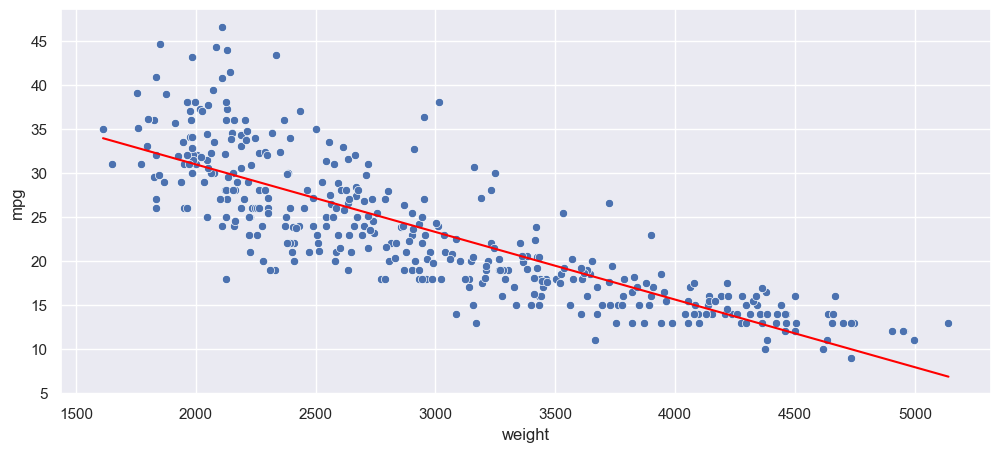

In [9]:
## Plotting the regression line
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=car_data, x='weight', y='mpg', ax=ax);
sns.lineplot(x=car_data['weight'], y=sm_weight_model.predict(car_data['weight']), ax=ax, color='red');

### Residuals

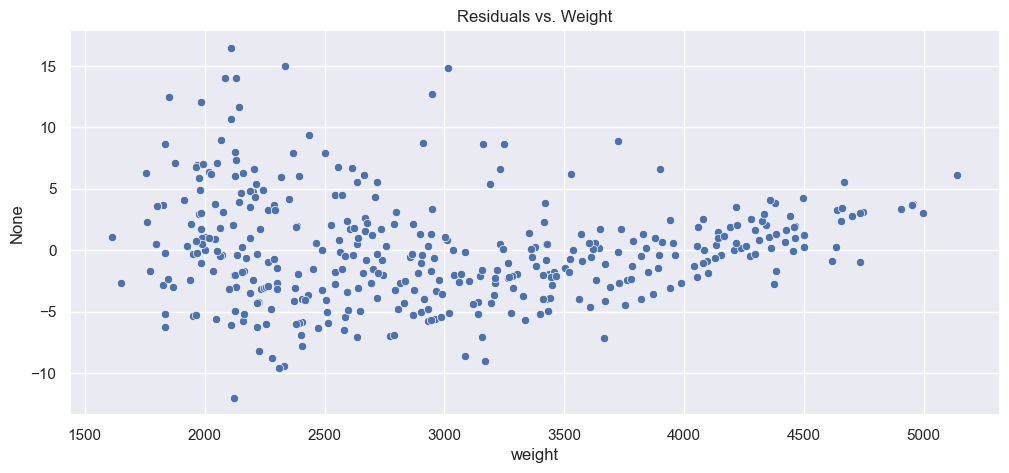

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=car_data['weight'], y=sm_weight_model.resid, ax=ax)
ax.title.set_text('Residuals vs. Weight')

## Multi-Variate

In [11]:
# car_data_df2 = car_data.copy()
# # Make sure horsepower is numeric
# car_data_df2['horsepower'] = pd.to_numeric(car_data_df2['horsepower'])
# car_data_df2['horsepower'].dtype

In [12]:
formula = 'mpg ~ weight + displacement + acceleration'
sm_multi_model = smf.ols(formula=formula, data=car_data).fit()

print(sm_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     307.0
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.01e-102
Time:                        19:02:34   Log-Likelihood:                -1142.7
No. Observations:                 398   AIC:                             2293.
Df Residuals:                     394   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.2991      1.861     22.186   

In [13]:
sse = np.sum(sm_multi_model.resid ** 2)
sse

7266.226023252989

### Plots

<Axes: xlabel='None', ylabel='None'>

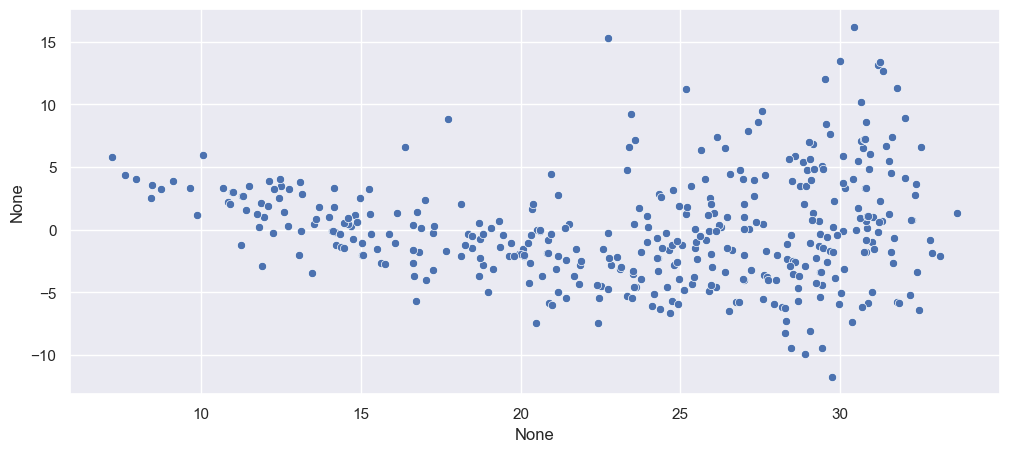

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=sm_multi_model.predict(car_data), y=sm_multi_model.resid, ax=ax)

# Homegrown

In [15]:
class LinearRegression:
    def __init__(self):
        pass

    def fit(self,X,y) -> None:
        

        # Make sure X and y and numpy are 2 dimensional numpy arrays
        self.X = self._clean_X(X)
        self.y = self._clean_y(y)
        self.n = X.shape[0]
        

        self.beta = np.array(np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y)
        self.beta = self.beta.flatten()
        self.calculate_model_metrics()
        


    def _clean_X(self,X) -> np.ndarray:

        X = X.copy()

        if isinstance(X, pd.Series):
            X = X.array
        elif isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        else:
            X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        X = np.array(X)

        # Add a column of ones to X to represent the intercept term
        X = np.hstack((np.ones((X.shape[0],1)), X))

        return X
    
    def _clean_y(self,y) -> np.ndarray:
        y = y.copy()

        if isinstance(y, pd.Series):
            y = y.array
        elif isinstance(y, pd.DataFrame):
            y = y.to_numpy()
        else:
            y = np.array(y)

        if len(y.shape) == 1:
            y = y.reshape(-1,1)
        y = np.array(y)

        return y

    def predict(self,X) -> np.ndarray:
        y_hats = self.X @ self.beta
        y_hats = y_hats.reshape(-1,1)
        return y_hats

    def summary(self):
        # Show the model summary: Coefficeints, R^2, SSE, SST, RMSE, etc.

        beta_names = [f'b_{i}' for i in range(len(self.beta))]
        coef_df = pd.DataFrame(columns=['betas','T_Stat','P_Value'],index=beta_names)
        coef_df['betas'] = self.beta
        self.coef_df = coef_df
        display(coef_df)

        metrics = pd.Series({'R^2': self.R2, 'SSE': self.SSE, 'SST': self.SST, 'RMSE': self.RMSE})
        self.metrics = metrics
        # display the metrics df but formatted with 5 decimal places, formatted with commas
        metrics_df = pd.DataFrame(metrics, columns=['Value'])
        metrics_df['Value'] = metrics_df['Value'].apply(lambda x: f'{x:,.5f}')
        display(metrics_df)


    def calculate_model_metrics(self):

        self.residuals = self.y - self.predict(self.X)
        self.SSE = np.sum(self.residuals**2)
        self.SST = np.sum((self.y - np.mean(self.y))**2)
        self.R2 = 1 - self.SSE / self.SST
        self.MSE = self.SSE / self.n
        self.RMSE = self.MSE**0.5

        # Calculate the T-Stats and P-Values for the coefficients
        # ... later


## Single Var

In [16]:
X = car_data['weight'].array
y = car_data['mpg'].array


my_weight_model = LinearRegression()
my_weight_model.fit(X, y)
my_weight_model.y.shape
my_weight_model.beta
y_pred = my_weight_model.predict(X)
my_weight_model.summary()

,betas,T_Stat,P_Value
b_0,46.317364,NaN,NaN
b_1,-0.007677,NaN,NaN


,Value
R^2,0.69179
SSE,"7,474.81401"
SST,"24,252.57548"
RMSE,4.33370


## Multi-Var

In [17]:

X = car_data[['weight', 'displacement', 'acceleration']]
y = car_data['mpg']

my_multi_model = LinearRegression()
my_multi_model.fit(X, y)
my_multi_model.summary()

,betas,T_Stat,P_Value
b_0,41.299076,NaN,NaN
b_1,-0.006189,NaN,NaN
b_2,-0.010895,NaN,NaN
b_3,0.173851,NaN,NaN


,Value
R^2,0.70039
SSE,"7,266.22602"
SST,"24,252.57548"
RMSE,4.27280


# The End